In [1]:
import matplotlib.pyplot as plt
import numpy as np
from flow_policy.stochastic_flow_policy import StochasticFlowPolicy
from flow_policy.plot_stochastic import (
    plot_probability_density_q,
    plot_probability_density_ε,
    plot_probability_density_and_vector_field,
    plot_probability_density_and_streamlines,
    plot_probability_density_with_trajectories,
)

from pydrake.all import (
    CompositeTrajectory,
    PiecewisePolynomial,
    Trajectory,
)

# Set seed
np.random.seed(0)

In [2]:
def demonstration_traj_right() -> Trajectory:
    """
    Returns a trajectory x(t) that is 0 for 0 < t < 0.25, and a sine curve
    for 0.25 < t < 1 that starts at 0 and ends at 0.75.
    """
    piece_1 = PiecewisePolynomial.FirstOrderHold(
        breaks=[0, 0.25],
        samples=[[0, 0]],
    )
    piece_2 = PiecewisePolynomial.CubicWithContinuousSecondDerivatives(
        breaks=[0.25, 0.50, 0.75, 1.0],
        samples=[[0.00, 0.62, 0.70, 0.5]],
        sample_dot_at_start=[[0.0]],
        sample_dot_at_end=[[-0.7]],
    )
    return CompositeTrajectory([piece_1, piece_2])

def demonstration_traj_left() -> Trajectory:
    """
    Returns a trajectory x(t) that is 0 for 0 < t < 0.25, and a sine curve
    for 0.25 < t < 1 that starts at 0 and ends at 0.75.
    """
    piece_1 = PiecewisePolynomial.FirstOrderHold(
        breaks=[0, 0.25],
        samples=[[0, 0]],
    )
    piece_2 = PiecewisePolynomial.CubicWithContinuousSecondDerivatives(
        breaks=[0.25, 0.50, 0.75, 1.0],
        samples=[[0.00, -0.62, -0.70, -0.5]],
        sample_dot_at_start=[[0.0]],
        sample_dot_at_end=[[0.7]],
    )
    return CompositeTrajectory([piece_1, piece_2])

traj_right = demonstration_traj_right()
traj_left = demonstration_traj_left()

## Plot demonstration trajectories

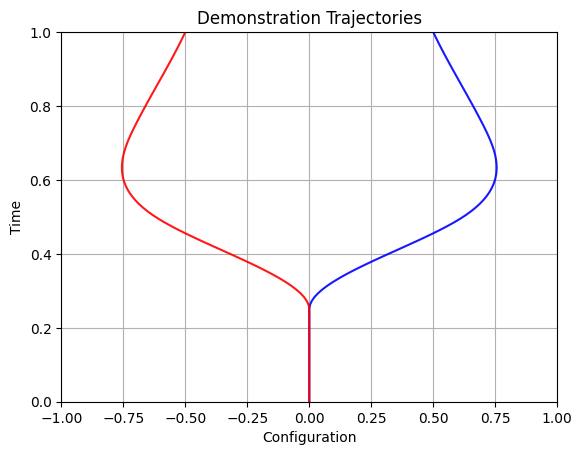

In [3]:
"""
Plot demonstration trajectory on x-y plane where x axis is the state in [-1, 1]
and y axis is the time in [0, 1].
"""
times = np.linspace(0, 1, 100)
plt.plot(traj_right.vector_values(times)[0], times, color='blue', alpha=0.9)
plt.plot(traj_left.vector_values(times)[0], times, color='red', alpha=0.9)
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.xlabel('Configuration')
plt.ylabel('Time')
plt.title('Demonstration Trajectories')
plt.grid(True)
plt.show()

## Conditional flow

In [4]:
fp = StochasticFlowPolicy(trajectories=[traj_right], prior=[1.0], σ0=0.02, σ1=0.05)

## Plot conditional probability path of right trajectory

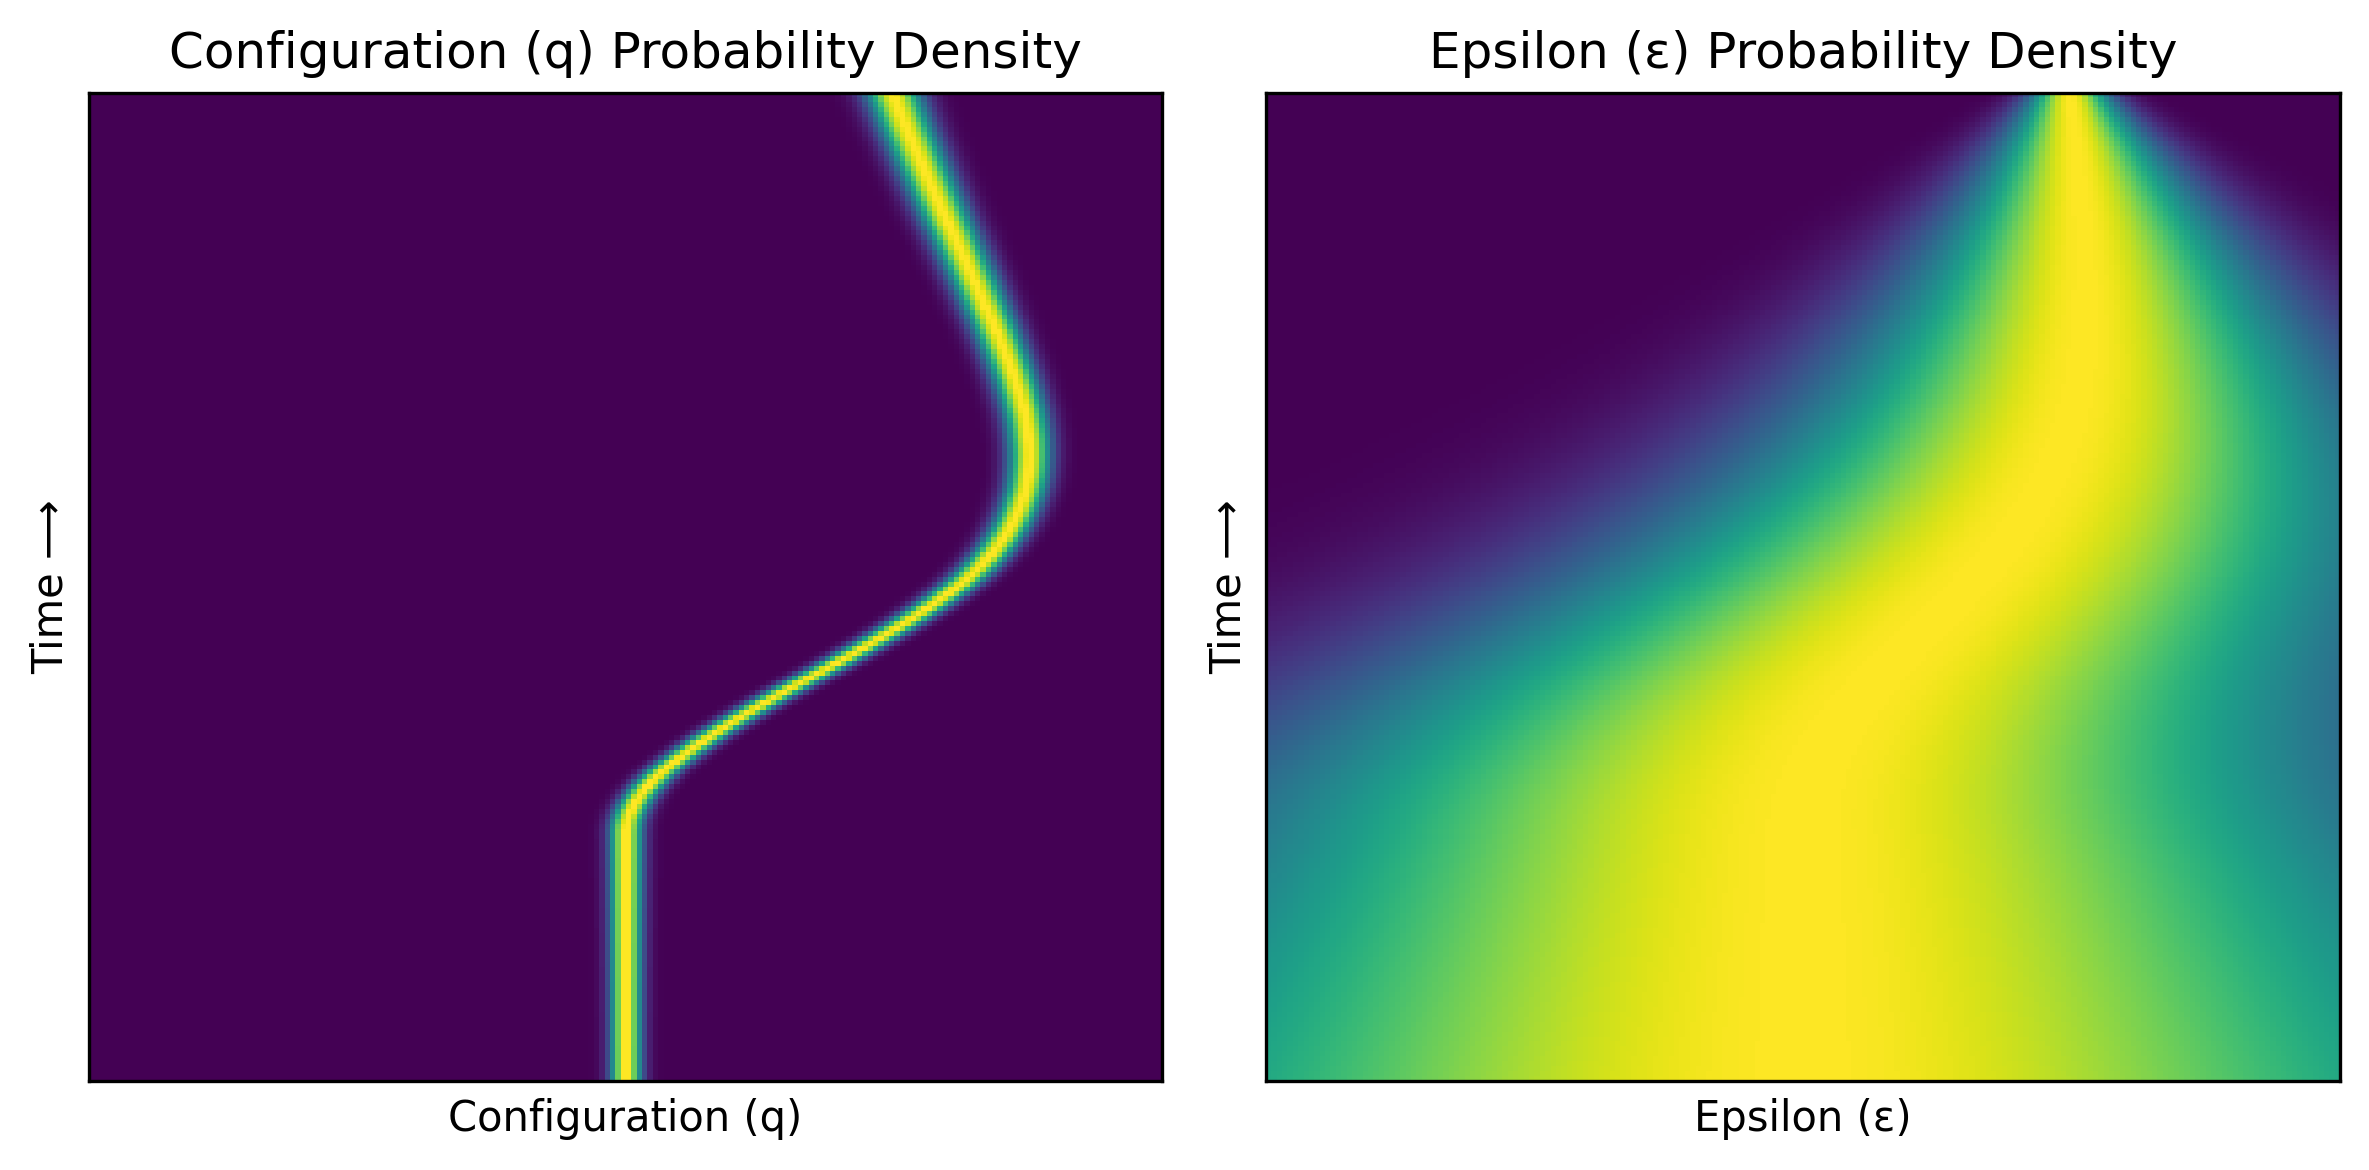

In [6]:
fig = plt.figure(figsize=(8, 4), dpi=300)

xs = np.linspace(-1, 1, 200)
ts = np.linspace(0, 1, 200)

gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

plot_probability_density_q(fp, ts, xs, ax1)
plot_probability_density_ε(fp, ts, xs, ax2)

ax1.set_title('Configuration (q) Probability Density')
ax2.set_title('Epsilon (ε) Probability Density')

ax1.set_xlabel('Configuration (q)')
ax1.set_ylabel('Time ⟶')
ax2.set_xlabel('Epsilon (ε)')
ax2.set_ylabel('Time ⟶')

ax1.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

## Plot conditional vector field of right trajectory

In [ ]:
fig = plt.figure(figsize=(9, 4), dpi=300)
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.05])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
im1 = plot_probability_density_and_vector_field(fp, ax1)
im2 = plot_probability_density_and_streamlines(fp, ax2)
plt.colorbar(im2, cax=ax3, label='Probability Density')
plt.tight_layout()  # Uncommented to adjust spacing
plt.show()

## Plot trajectories under conditional flow of right trajectory

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
im = plot_probability_density_with_trajectories(fp, ax, [None] * 20)
plt.colorbar(im, ax=ax, label='Probability Density')
plt.show()


# Marginal flow

In [8]:
fp = FlowPolicy(trajectories=[traj_right, traj_left], prior=[0.5, 0.5], sigma=0.05)

## Plot marginal probability path

In [ ]:
ts = np.linspace(0, 1, 200)  # (T,)
xs = np.linspace(-1, 1, 200)  # (X,)
ts, xs = np.meshgrid(ts, xs, indexing='ij')  # (T, X)
p = fp.pdf_marginal(xs, ts)  # (T, X)
plt.imshow(p, origin='lower')
plt.colorbar()
plt.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)
# plt.tight_layout()
plt.show()


## Plot marginal vector field

In [ ]:
fig = plt.figure(figsize=(9, 4), dpi=300)
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.05])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
im1 = plot_probability_density_and_vector_field(fp, ax1)
im2 = plot_probability_density_and_streamlines(fp, ax2)
plt.colorbar(im2, cax=ax3, label='Probability Density')
plt.tight_layout()  # Uncommented to adjust spacing
plt.show()

## Plot trajectories under marginal flow

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
im = plot_probability_density_with_trajectories(fp, ax, [None] * 20)
plt.colorbar(im, ax=ax, label='Probability Density')
plt.tight_layout()
plt.show()

# Pathology when starting from $q=0$

Let us compute the trajectory from the current configuration $q=0$.

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
im = plot_probability_density_with_trajectories(fp, ax, [0], linewidth=2)
plt.colorbar(im, ax=ax, label='Probability Density')
plt.tight_layout()
plt.show()

### Explanation

This is due to:
1. The flow being a deterministic. Which means that for a fixed starting point (i.e. initial configuration), the trajectory is fixed.
2. In this particular example, the demonstration trajectories are symmetric. This causes the learned velocity field to be zero at $q=0$ for all $t \in [0, 1]$. Therefor, the sampled trajectory is pathological.

The sampled trajectory is not near the demonstration trajectories. Flow matching only guarantees that the marginal distribution of configurations is matched at each timestep. Note that the probability of exactly sampling the pathological trajectory is zero, so the flow matching guarantees are satisfied.